In [35]:
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
sns.set_theme()

In [36]:
folder = 'Final/KavyaRuns/Coevolution/Coevolution5DQNAgent_20DUELiterations_5GAiterations_30GApopulation_20AGENTepisodes/'

In [37]:
duel_training_pickle = None
with open(f'{folder}Coevolution', 'rb') as f:
    duel_training_pickle = pickle.load(f)

In [38]:
iterations = max(list(duel_training_pickle.keys()))+1
avg_DQN_fitness, avg_GA_fitness = [], []
for i in range(iterations):
    epochs = len(duel_training_pickle[i]['train_episode_food'])-1
    arr = np.array(duel_training_pickle[i]['train_episode_food'][0:-1])
    avg_DQN_fitness.append([]) 
    avg_DQN_fitness[-1] = list(np.mean(arr.reshape(-1, 4), axis=1))
    
    generations = len(duel_training_pickle[i]['fitness values'])
    avg_GA_fitness.append([])
    for g in range(generations):
        avg_GA_fitness[-1].append(-1*5*sum(duel_training_pickle[i]['fitness values'][g])/len(duel_training_pickle[i]['fitness values'][g]))
print(avg_DQN_fitness)        
print(avg_GA_fitness)

[[15.0, 14.75, 12.75, 13.25, 10.75], [12.25, 6.0, 8.5, 12.25, 16.25], [16.0, 8.75, 12.75, 6.0, 9.25], [9.75, 16.25, 12.25, 12.75, 15.5], [12.5, 11.75, 15.0, 14.0, 13.5], [11.75, 5.25, 8.75, 7.75, 10.0], [16.0, 17.75, 14.25, 12.75, 14.25]]
[[9.633333333333333, 8.433333333333334, 5.800000000000001, 5.6, 4.7], [4.633333333333334, 4.533333333333332, 4.466666666666666, 3.5333333333333323, 4.4], [6.400000000000001, 5.666666666666668, 5.8, 5.5, 6.800000000000002], [8.26666666666667, 7.233333333333333, 6.633333333333335, 8.066666666666668, 4.033333333333333], [3.5666666666666673, 3.3, 3.0333333333333323, 2.8333333333333335, 3.3333333333333335], [11.8, 13.066666666666665, 11.0, 7.033333333333332, 8.633333333333333], [6.533333333333332, 7.866666666666666, 6.433333333333332, 4.566666666666667, 5.933333333333334]]


In [39]:
X_DQN, Y_DQN = [], []
X_GA, Y_GA = [], []

for i in range(iterations):
    X_DQN.extend([j for j in range(i*10, i*10+5)])
    Y_DQN.extend(avg_DQN_fitness[i])
    X_GA.extend([j for j in range(i*10+5, (i+1)*10)])
    Y_GA.extend(avg_GA_fitness[i])

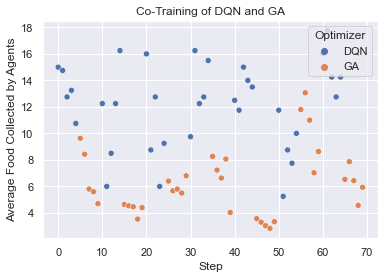

In [40]:
sns.set(style='darkgrid')

df = pd.DataFrame()
df['Step'] = X_DQN + X_GA
df['Average Food Collected by Agents'] = Y_DQN + Y_GA
df['Optimizer'] = ['DQN' for x in X_DQN] + ['GA' for x in X_GA]
ax = sns.scatterplot(data=df, x='Step', y='Average Food Collected by Agents', hue='Optimizer')
plt.title('Co-Training of DQN and GA')

plt.savefig('Final/Plots/cotraining_DQNAgent_scatterplot.png')